In [1]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1,100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
    n=len(arr)
    rows=int(np.ceil(n/10))
    cols = n if rows<2 else 10
    fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i,j].imshow(arr[i*10+j],cmap="gray_r")
            axs[i,j].axis('off')
    plt.show()

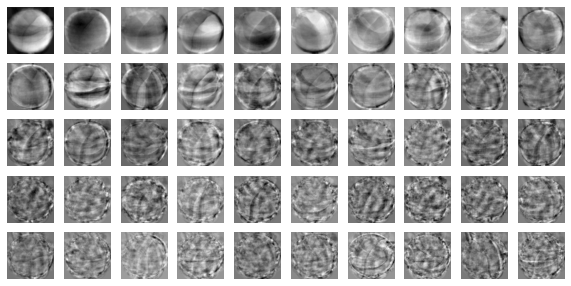

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [10]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

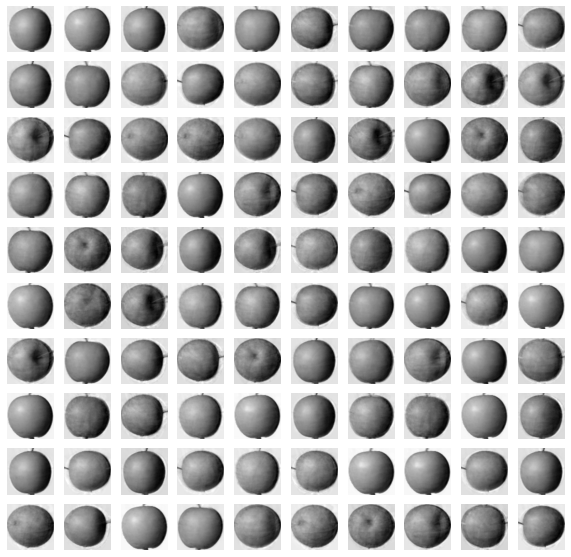

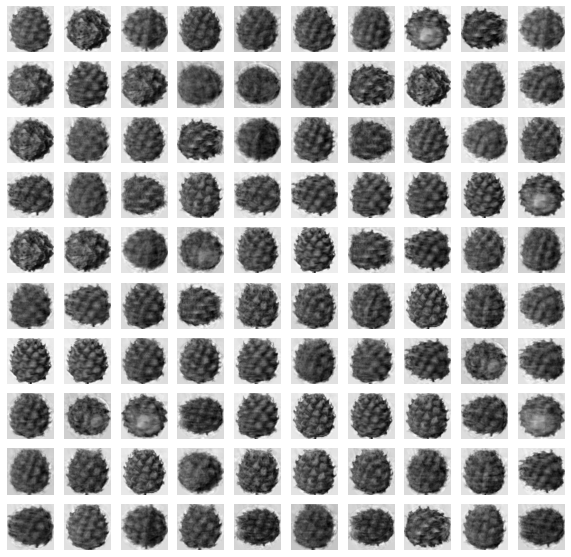

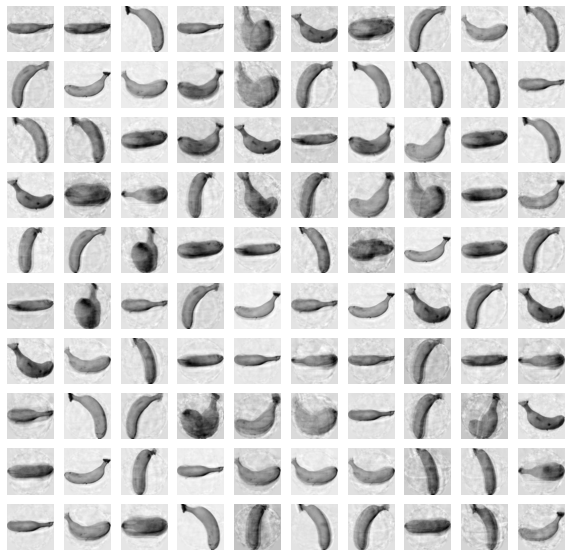

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [15]:
np.sum(pca.explained_variance_ratio_)

0.9215032827635168

In [16]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486379, 0.00480342,
       0.00447835, 0.00437314, 0.00408041, 0.00389472, 0.00372428,
       0.0035928 , 0.00331438, 0.0031783 , 0.00304332, 0.00303751,
       0.00288854, 0.00275845, 0.00264617, 0.00255812, 0.00252021,
       0.00247302, 0.00239261, 0.00230886, 0.00222003, 0.0021686 ,
       0.0021407 , 0.00196293, 0.00191488, 0.00189577, 0.00183589,
       0.00180708, 0.00171846, 0.00168411, 0.00163003, 0.00160145])

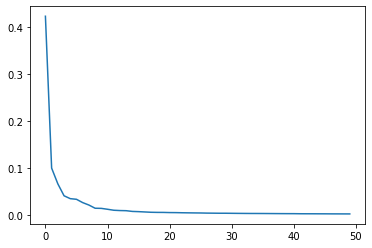

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [20]:
target = np.array([0]*100+[1]*100+[2]*100)

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.31597747802734377


In [23]:
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029622650146484374


In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print(pca.n_components_)

2


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [30]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03296031951904297


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [31]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([ 91,  99, 110], dtype=int64))


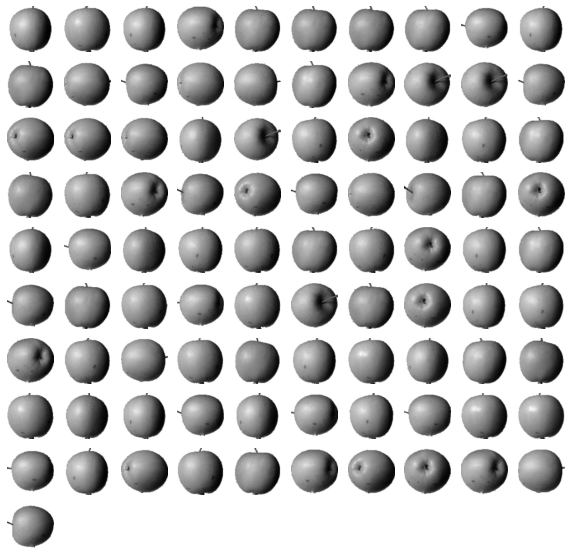

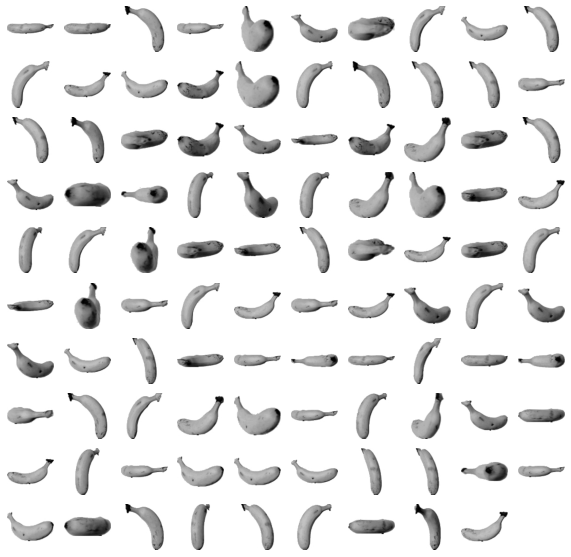

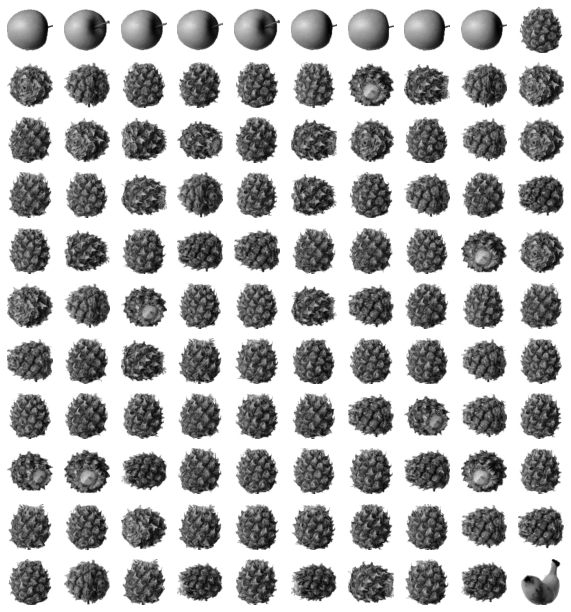

In [32]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')

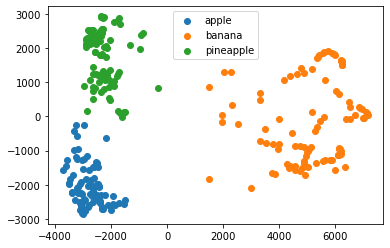

In [33]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()